In [8]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests

In [9]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [10]:
# Import the API key.
from config import weather_api_key

In [11]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [12]:
#pip install citipy

In [13]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3ac010e7bf363acfed0563ef7e7244f9


In [14]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [15]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

644

In [16]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [17]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | punta arenas
Processing Record 2 of Set 1 | ancud
Processing Record 3 of Set 1 | kahului
Processing Record 4 of Set 1 | qaanaaq
Processing Record 5 of Set 1 | arraial do cabo
Processing Record 6 of Set 1 | mar del plata
Processing Record 7 of Set 1 | puerto ayora
Processing Record 8 of Set 1 | tasiilaq
Processing Record 9 of Set 1 | constitucion
Processing Record 10 of Set 1 | rikitea
Processing Record 11 of Set 1 | tiksi
Processing Record 12 of Set 1 | saint george
Processing Record 13 of Set 1 | busselton
Processing Record 14 of Set 1 | varkaus
Processing Record 15 of Set 1 | ocampo
Processing Record 16 of Set 1 | khromtau
Processing Record 17 of Set 1 | chokurdakh
Processing Record 18 of Set 1 | murree
Processing Record 19 of Set 1 | mataura
Processing Record 20 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 21 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 22 of Set 1 | nokaneng
Processing Record 23 of Set 1 |

Processing Record 35 of Set 4 | santa lucia
Processing Record 36 of Set 4 | mys shmidta
City not found. Skipping...
Processing Record 37 of Set 4 | saskylakh
Processing Record 38 of Set 4 | hays
Processing Record 39 of Set 4 | sioux lookout
Processing Record 40 of Set 4 | taneatua
City not found. Skipping...
Processing Record 41 of Set 4 | ponta do sol
Processing Record 42 of Set 4 | honiara
Processing Record 43 of Set 4 | saint-pierre
Processing Record 44 of Set 4 | ambilobe
Processing Record 45 of Set 4 | saint-philippe
Processing Record 46 of Set 4 | sao filipe
Processing Record 47 of Set 4 | a coruna
Processing Record 48 of Set 4 | vilyuysk
Processing Record 49 of Set 4 | wulanhaote
City not found. Skipping...
Processing Record 50 of Set 4 | oneida
Processing Record 1 of Set 5 | aleysk
Processing Record 2 of Set 5 | yuzhno-yeniseyskiy
City not found. Skipping...
Processing Record 3 of Set 5 | emerald
Processing Record 4 of Set 5 | port elizabeth
Processing Record 5 of Set 5 | padan

Processing Record 20 of Set 8 | killam
Processing Record 21 of Set 8 | aswan
Processing Record 22 of Set 8 | prainha
Processing Record 23 of Set 8 | birjand
Processing Record 24 of Set 8 | yangjiang
Processing Record 25 of Set 8 | dingle
Processing Record 26 of Set 8 | port-gentil
Processing Record 27 of Set 8 | waterloo
Processing Record 28 of Set 8 | narsaq
Processing Record 29 of Set 8 | baherden
Processing Record 30 of Set 8 | nhulunbuy
Processing Record 31 of Set 8 | lavrentiya
Processing Record 32 of Set 8 | mount gambier
Processing Record 33 of Set 8 | severo-kurilsk
Processing Record 34 of Set 8 | katsuura
Processing Record 35 of Set 8 | lebedinyy
Processing Record 36 of Set 8 | alofi
Processing Record 37 of Set 8 | palmer
Processing Record 38 of Set 8 | grand gaube
Processing Record 39 of Set 8 | tombouctou
Processing Record 40 of Set 8 | xiangxiang
Processing Record 41 of Set 8 | yerbogachen
Processing Record 42 of Set 8 | ayan
Processing Record 43 of Set 8 | turukhansk
Proce

Processing Record 12 of Set 12 | mehamn
Processing Record 13 of Set 12 | isabela
Processing Record 14 of Set 12 | kirkby in ashfield
Processing Record 15 of Set 12 | coruripe
Processing Record 16 of Set 12 | port hardy
Processing Record 17 of Set 12 | zyryanka
Processing Record 18 of Set 12 | baft
Processing Record 19 of Set 12 | doka
Processing Record 20 of Set 12 | hornepayne
Processing Record 21 of Set 12 | hofn
Processing Record 22 of Set 12 | jizan
Processing Record 23 of Set 12 | freeport
Processing Record 24 of Set 12 | vardo
Processing Record 25 of Set 12 | iqaluit
Processing Record 26 of Set 12 | corn island
Processing Record 27 of Set 12 | kangaatsiaq
Processing Record 28 of Set 12 | aquin
Processing Record 29 of Set 12 | najran
Processing Record 30 of Set 12 | kembe
Processing Record 31 of Set 12 | tumannyy
City not found. Skipping...
Processing Record 32 of Set 12 | beruni
City not found. Skipping...
Processing Record 33 of Set 12 | gat
Processing Record 34 of Set 12 | bual

In [19]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Punta Arenas,-53.1500,-70.9167,57.22,44,75,26.46,CL,2022-11-16 19:40:21
1,Ancud,-41.8697,-73.8203,59.16,76,32,8.19,CL,2022-11-16 19:43:45
2,Kahului,20.8947,-156.4700,80.62,67,20,11.50,US,2022-11-16 19:37:16
3,Qaanaaq,77.4840,-69.3632,-1.19,98,100,3.04,GL,2022-11-16 19:43:46
4,Arraial Do Cabo,-22.9661,-42.0278,76.96,83,75,12.66,BR,2022-11-16 19:37:16
5,Mar Del Plata,-38.0023,-57.5575,78.84,66,75,12.66,AR,2022-11-16 19:40:10
6,Puerto Ayora,-0.7393,-90.3518,78.76,86,64,7.00,EC,2022-11-16 19:40:23
7,Tasiilaq,65.6145,-37.6368,32.16,98,100,12.15,GL,2022-11-16 19:43:46
8,Constitucion,-35.3333,-72.4167,66.92,63,44,17.65,CL,2022-11-16 19:40:57
9,Rikitea,-23.1203,-134.9692,74.08,89,100,25.37,PF,2022-11-16 19:43:47


In [20]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [21]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [22]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1668642545.0174348

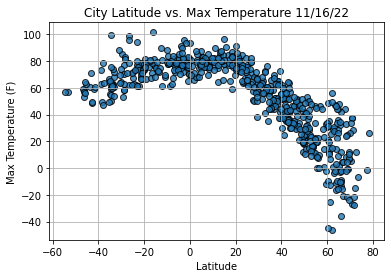

In [23]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

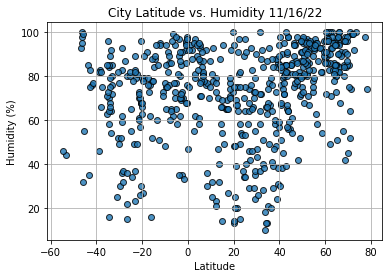

In [24]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

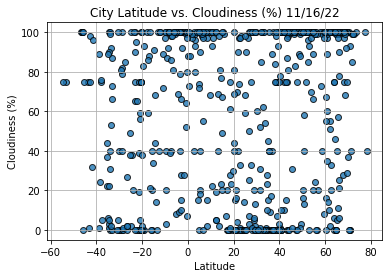

In [25]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

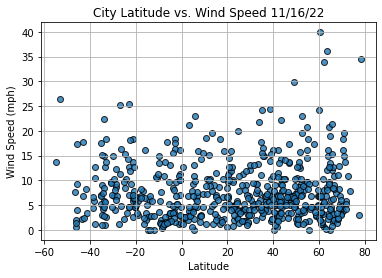

In [26]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [ ]:
#MODULE 6.4.2

In [28]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()


In [32]:
index13 = city_data_df.loc[13]
index13

City                      Varkaus
Lat                       62.3153
Lng                        27.873
Max Temp                     29.3
Humidity                       93
Cloudiness                     33
Wind Speed                   5.39
Country                        FI
Date          2022-11-16 19:43:47
Name: 13, dtype: object

In [33]:
city_data_df["Lat"] >= 0

0      False
1      False
2       True
3       True
4      False
       ...  
582     True
583     True
584     True
585     True
586     True
Name: Lat, Length: 587, dtype: bool

In [36]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

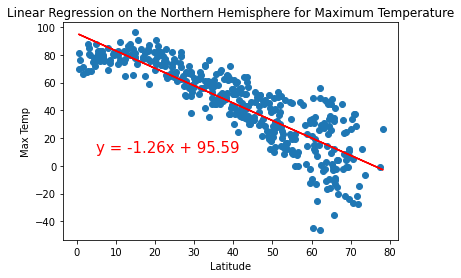

In [40]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Maximum Temperature', 'Max Temp',(5,10))

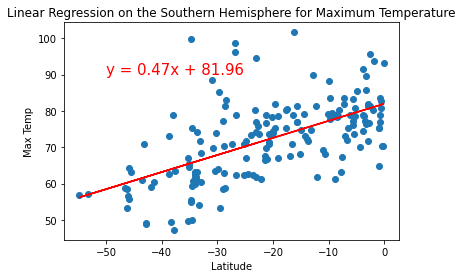

In [41]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Maximum Temperature', 'Max Temp',(-50,90))

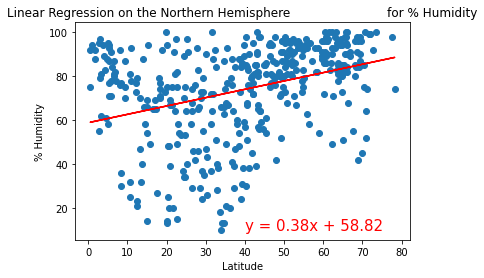

In [42]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

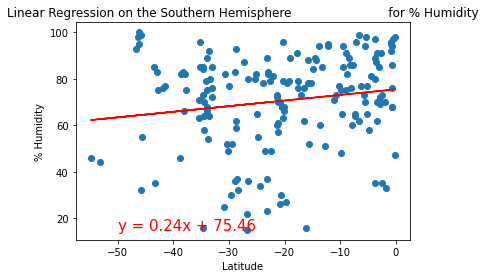

In [43]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

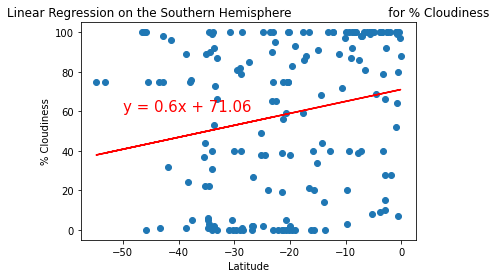

In [44]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

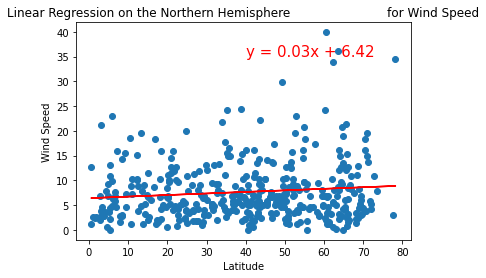

In [45]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

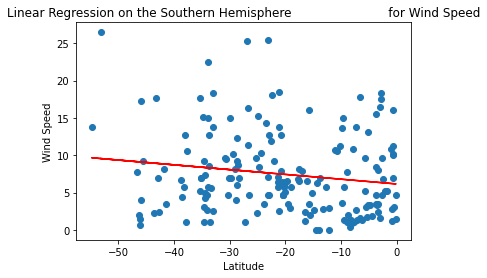

In [46]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))

In [ ]:
######## EXTRA CODE BELOW

In [ ]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [ ]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
print(city_url)


In [ ]:
# Make a 'Get' request for the city weather.
city_weather = requests.get(city_url)
city_weather

In [ ]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Bston"
city_weather = requests.get(city_url)
city_weather

In [ ]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
city_weather

In [ ]:
# Get the text of the 'Get' request.
city_weather.text


In [ ]:
# Get the JSON text of the 'Get' request.
city_weather.json()

In [ ]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
city_weather.json()


In [ ]:
# Get the JSON data.
boston_data = city_weather.json()

In [ ]:
boston_data["sys"]

In [ ]:
lat = boston_data["coord"]["lat"]
lng = boston_data["coord"]["lon"]
max_temp = boston_data["main"]["temp_max"]
humidity = boston_data["main"]["humidity"]
clouds = boston_data["clouds"]["all"]
wind = boston_data["wind"]["speed"]
print(lat, lng, max_temp, humidity, clouds, wind)

In [ ]:
# Get the date from the JSON file.
date = boston_data["dt"]
# Convert the UTC date to a date format with year, month, day, hours, minutes, and seconds.
datetime.utcfromtimestamp(date)

In [ ]:
datetime.utcfromtimestamp(date).strftime('%Y-%m-%d %H:%M:%S')

In [ ]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])



In [ ]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [ ]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

In [ ]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

In [ ]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

    
    

In [ ]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)